# U.S. Accident Project 

### Contents:

1.Importing libraries and data

2.Relationships and visualizations

3.Next steps and hypotheses


#### 1.Importing libraries and data

In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
#importing data
df_accidents = pd.read_pickle('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/accidents_clean.pkl')

In [5]:
df_accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Date', 'Year'],
      dtype='object')

In [4]:
#creating a subset with only necessary variables
sub1 = df_accidents[['Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)','Precipitation(in)', 'Visibility(mi)']]

In [5]:
sub1

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Precipitation(in),Visibility(mi)
0,3.230,42.1,58.0,29.76,10.4,0.00,10.0
4,0.500,37.0,93.0,29.69,10.4,0.01,10.0
5,1.427,35.6,100.0,29.66,8.1,NaN,10.0
7,0.521,33.1,92.0,29.63,3.5,0.08,0.5
8,0.491,39.0,70.0,29.59,11.5,NaN,10.0
...,...,...,...,...,...,...,...
2845337,0.543,86.0,40.0,28.92,13.0,0.00,10.0
2845338,0.338,70.0,73.0,29.39,6.0,0.00,10.0
2845339,0.561,73.0,64.0,29.74,10.0,0.00,10.0
2845340,0.772,71.0,81.0,29.62,8.0,0.00,10.0


In [38]:
#checking for missing values in the new subset
sub1.isnull().sum()

Distance(mi)              0
Temperature(F)            0
Humidity(%)            3345
Pressure(in)           1720
Wind_Speed(mph)           0
Precipitation(in)    150012
Visibility(mi)         7232
dtype: int64

In [6]:
sub1 = sub1.dropna(subset = ['Visibility(mi)'])

In [7]:
sub1.isnull().sum()

Distance(mi)              0
Temperature(F)            0
Humidity(%)            3298
Pressure(in)           1535
Wind_Speed(mph)           0
Precipitation(in)    149521
Visibility(mi)            0
dtype: int64

In [8]:
sub1 = sub1.dropna(subset = ['Humidity(%)'])

In [9]:
sub1.isnull().sum()

Distance(mi)              0
Temperature(F)            0
Humidity(%)               0
Pressure(in)           1530
Wind_Speed(mph)           0
Precipitation(in)    149380
Visibility(mi)            0
dtype: int64

#### 2.Relationships and visualizations

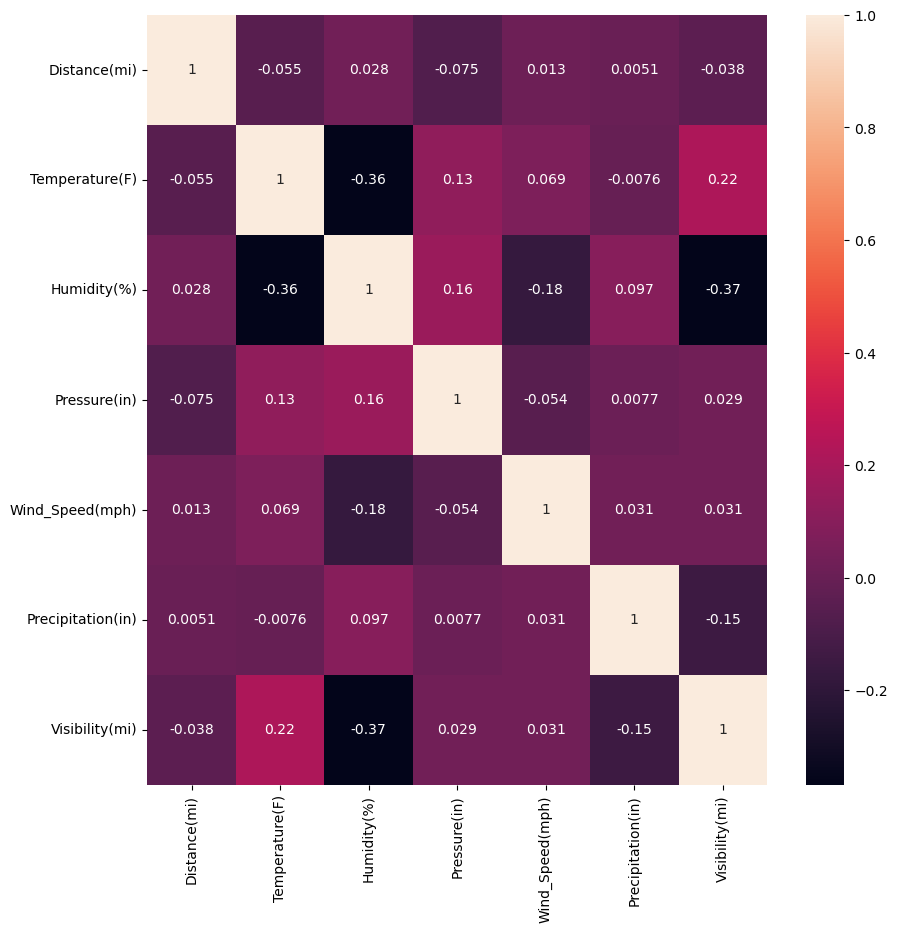

In [10]:
# Creating subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn
corr = sns.heatmap(sub1.corr(), annot = True, ax = ax)

In [12]:
#exporting the heatmap
corr.figure.savefig('heatmap.png')

Weak negative relationship between visibility and precipitation: visibility slightly decreases with increased precipitation.

Moderate negative relationship between visibility and humidity: visibility decreases with increased humidity.

Weak positive relationship between temperature and visibility: visibility improves as temperature increases.

Weak positive correlation between humidity and pressure.

Weak positive correlation between temperature and pressure.

Weak negative correlation between humidity and wind speed.

<AxesSubplot:xlabel='Distance(mi)', ylabel='Precipitation(in)'>

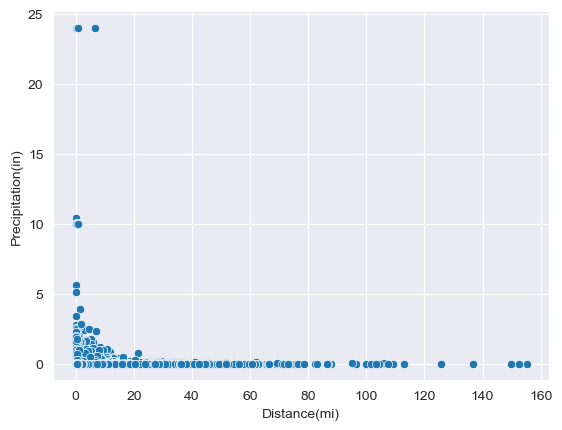

In [27]:
#creating scatterplots for strongest correlations
sns.scatterplot(x = 'Distance(mi)', y = 'Precipitation(in)', data = sub1)

Currently, this scatterplot shows a longer part of the road is affected when precipitation is lower. However, the outliers can be removed in a new subset to further examine this correlation and get more precise insight. 

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Visibility(mi)'>

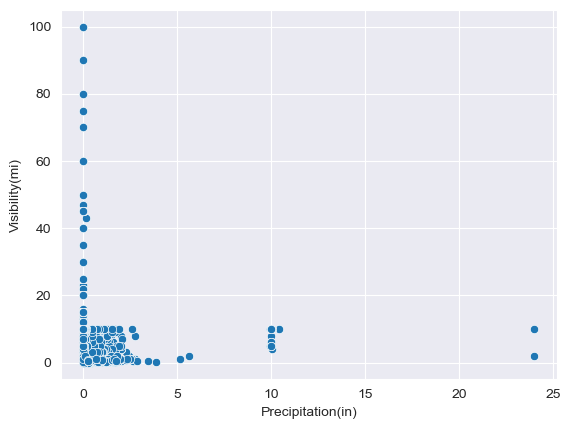

In [26]:
sns.scatterplot(x = 'Precipitation(in)', y = 'Visibility(mi)', data = sub1)

Although the trend line shows a very weak negative relationship between precipitation and visibility, some data points show higher visibility when precipitation is 0 inches. However, overall, most data points are clustered within the range of normal distance for visibility and precipitation does not seem to have a significant impact on visibility. 

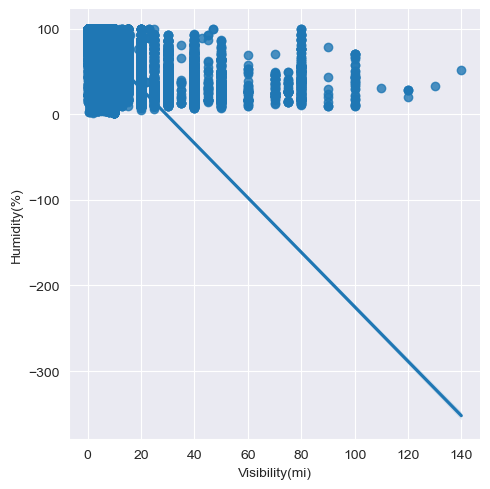

In [13]:
sns.set_style("darkgrid")
g = sns.lmplot(x="Visibility(mi)", y="Humidity(%)", data=sub1)


<AxesSubplot:xlabel='Visibility(mi)', ylabel='Humidity(%)'>

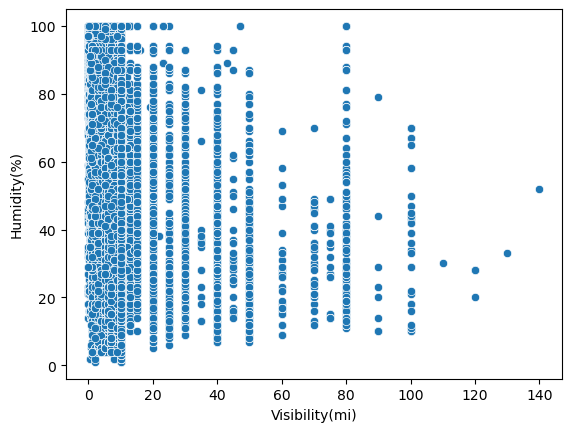

In [10]:
sns.scatterplot(x='Visibility(mi)', y='Humidity(%)', data=sub1)

Most data points are within 0 to 10 miles of visibility and this scatterplot shows no significant correlation between humidity and visibility.

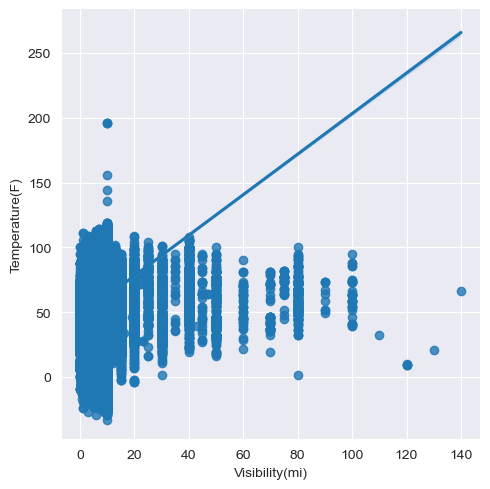

In [15]:
sns.lmplot(x = 'Visibility(mi)', y = 'Temperature(F)', data = sub1)

Most data points are within 0 to 10 miles of visibility and this scatterplot shows no significant correlation between temperature and visibility either. However, datapoints with higher visibility seem to happen when temperature is higher.

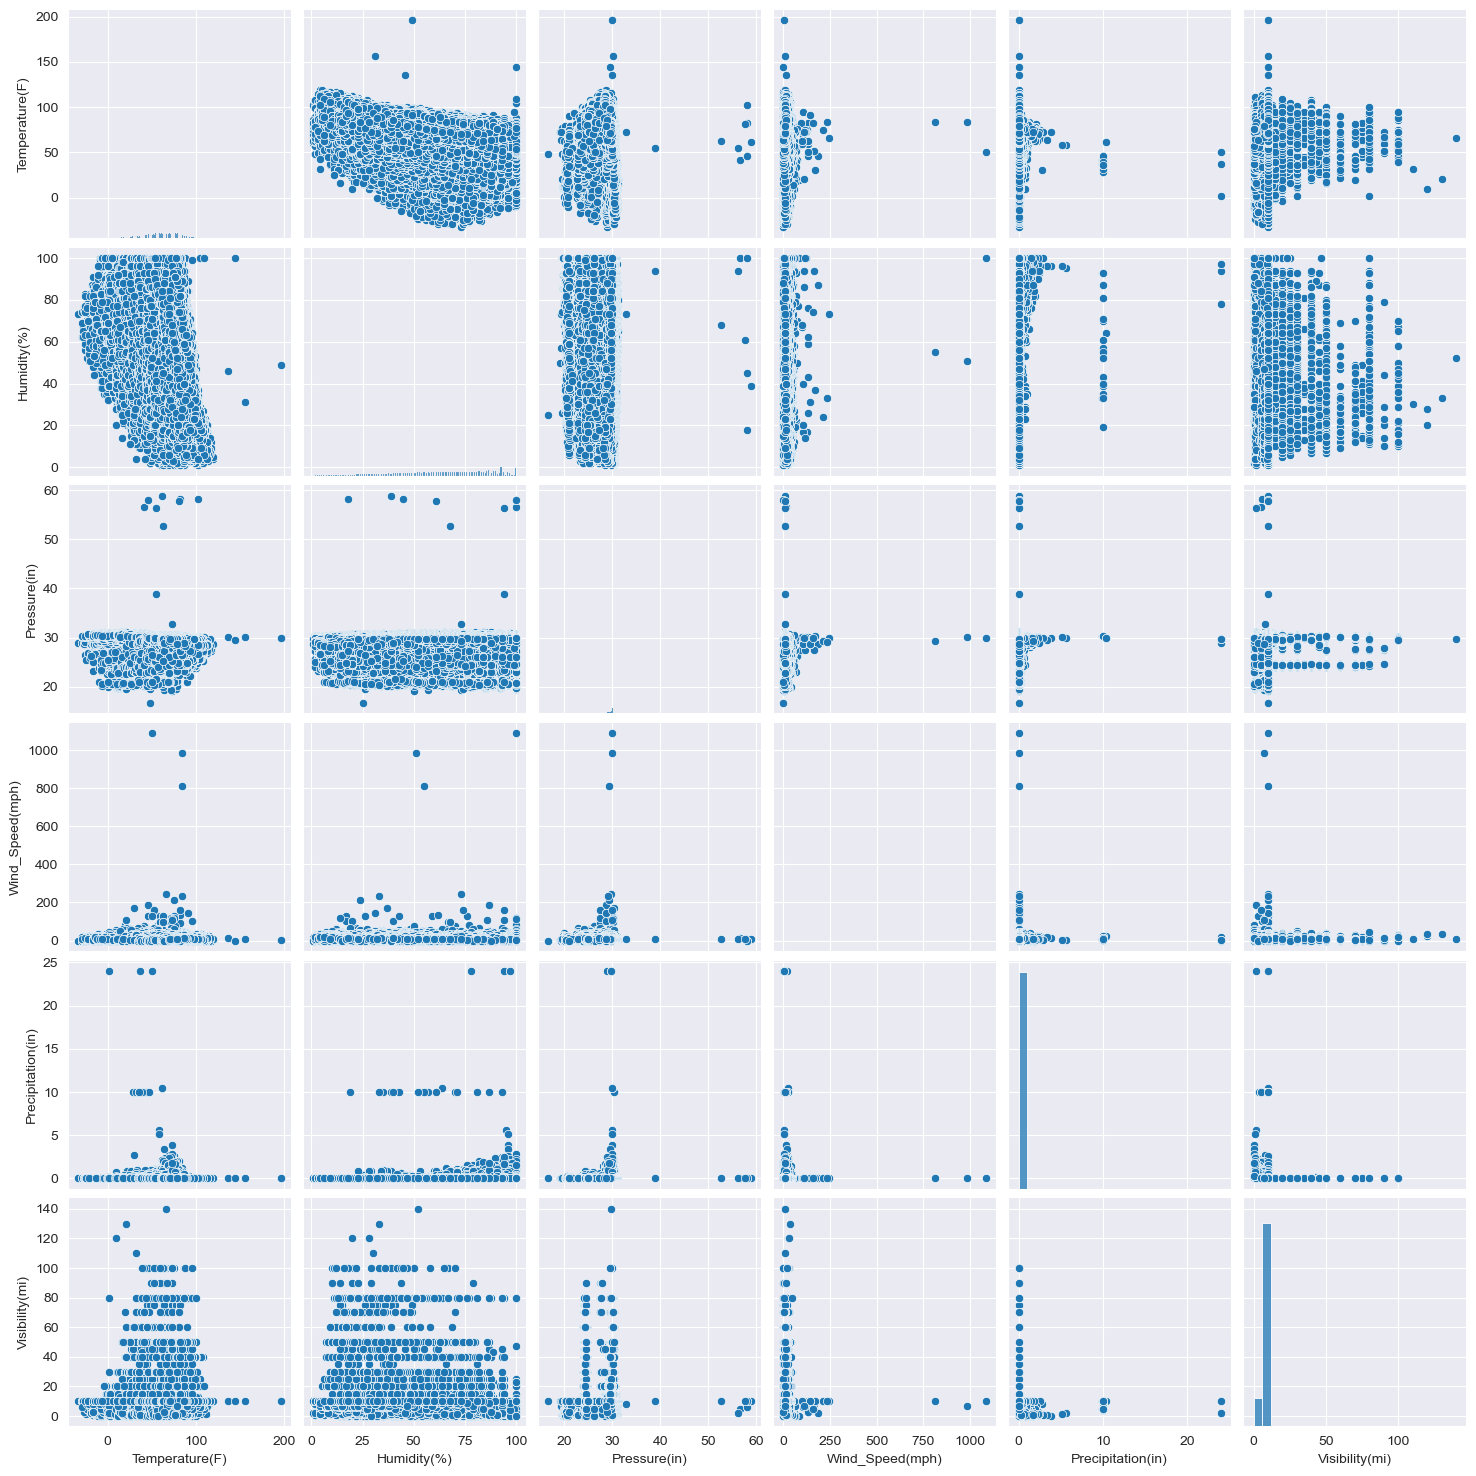

In [17]:
#creating a pairplot
g2 = sns.pairplot(sub1)

The moderate negative correlation betweeen humidity and temperature is obvious in the pairplot and higher humidity in lower temperatures.

Precipitation seems to go higher in higher temperatures.

Many of the charts can be further investigated by creating subsets of the dataset and removing outliers to explore the correlations within a more concentrated dataset. These charts include: visibility and precipitation scatterplot, wind speed and visibility, humidity and precipitation, precipitation and humidity, visibility and temperature,wind speed and humidity, visibility and humidity, distance and precipitation.

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

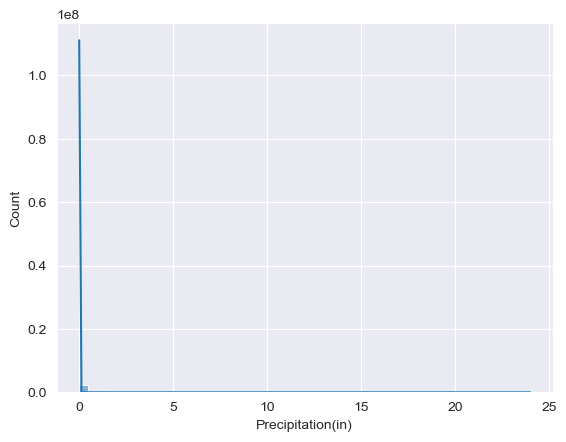

In [55]:
#histogram to visualize the distribution of precipitation
sns.histplot(sub1['Precipitation(in)'], bins = 50, kde = True)

<AxesSubplot:xlabel='Humidity(%)', ylabel='Count'>

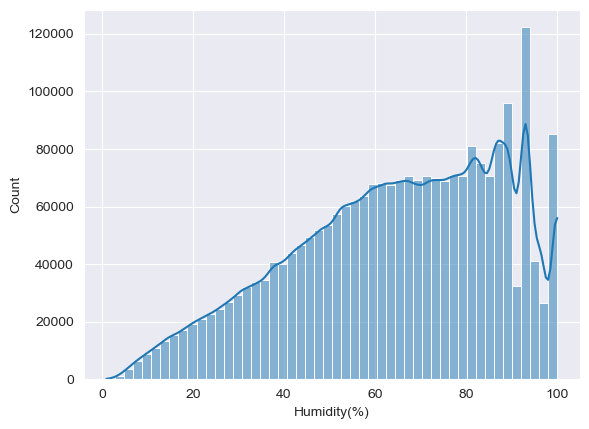

In [56]:
#creating a categorical plot
#histogram to visualize the distribution of the variables
sns.histplot(sub1['Humidity(%)'], bins = 50, kde = True)

In [15]:
#creating categories for the plot
sub1.loc[sub1['Humidity(%)'] < 40, 'Humidity category'] = 'Low humidity'

In [16]:
sub1.loc[(sub1['Humidity(%)'] >= 40) & (sub1['Humidity(%)'] < 80), 'Humidity category'] = 'Average humidity'

In [17]:
sub1.loc[sub1['Humidity(%)'] >= 80, 'Humidity category'] = 'High humidity'

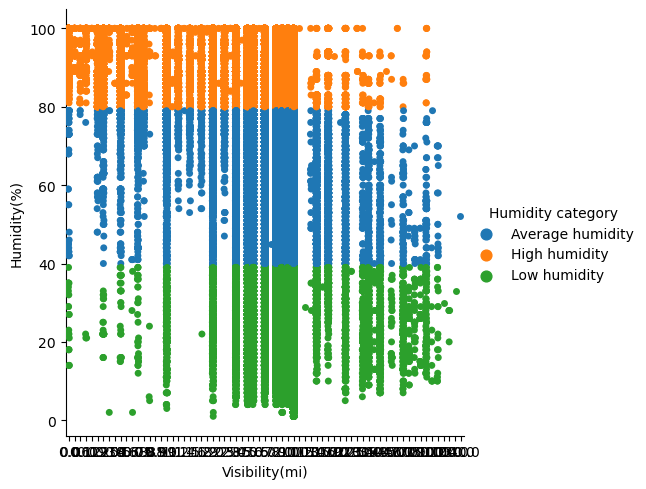

In [18]:
#creating the plot
g2 = sns.catplot(x="Visibility(mi)", y="Humidity(%)", hue="Humidity category", data=sub1)

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

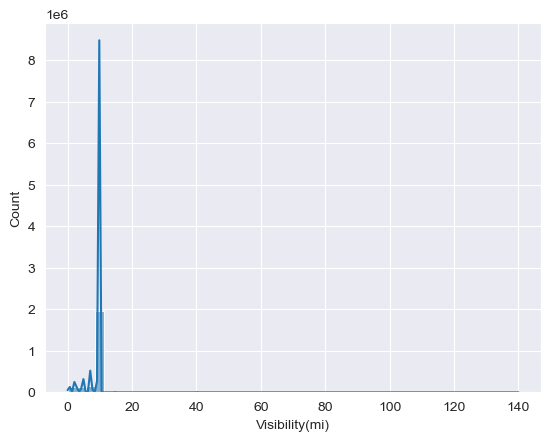

In [60]:
#histogram for distribution of visibility
sns.histplot(sub1['Visibility(mi)'], bins = 50, kde = True)

#### 3.Next steps and hypotheses

Next steps:

More visualizations with smaller and more concentrated datasets with removed outliers will be created to further investigate these correlations and variables.

Hypotheses to test:

Visibility decreases with higher precipitation.

High precipitation numbers occur with higher humidity.

Higher numbers for precipitation occur in higher temperatures.